In [46]:
include("Energies.jl")
include("newArrheniusEq.jl")
using Plots
using Printf
using Statistics
gr()
display(Ea_values)

6×6 Matrix{Real}:
 0      0.01   0.01  0.01   0.01   0.01
 0.032  0      0.02  0.04   0.055  0.062
 0.06   0.048  0     0.062  0.083  0.09
 0.038  0.046  0.04  0      0.051  0.048
 0.027  0.05   0.05  0.04   0      0.06
 0.03   0.06   0.06  0.04   0.063  0

In [55]:
"""
function simulate_deposition1(existing_layers, fcoeff, Ea_values, T_range, num_steps, dt)
    # Initialize existing_layers as a 2D array
    new_layer = [1.0 0.0 0.0 0.0 0.0 0.0]
    compositions_all = [] # Initialize compositions for all temperatures
    A = 0.1 # Arrhenius prefactor
    gprob = 1.0 # Probability of a new layer being deposited
    for T in T_range
        compositions = [] # Initialize compositions for each temperature
        k_m = arrhenius_rate_matrix(Ea_values, T) # Calculate rate constants for all phases
        #display(k_m)
        for step in 1:num_steps
            print(step)
            existing_layers += A * fcoeff * k_m * existing_layers * dt
            if rand() < gprob # Check if a new layer is deposited
                existing_layers = vcat(reshape(new_layer, 1, :), existing_layers)
            end
        end
        push!(compositions_all, existing_layers)
    end
    return compositions_all
end
"""
function simulate_deposition(fcoeff, Ea_values, T_range, num_steps, dt)
    # Initialize existing_layers as a 2D array
    new_layer = [1.0 0.0 0.0 0.0 0.0 0.0]
    compositions_all = [] # Initialize compositions for all temperatures
    A = 0.1 # Arrhenius prefactor 
    gprob = 1.0 # Probability of a new layer being deposited
    for T in T_range
        existing_layers = [1.0 0.0 0.0 0.0 0.0 0.0] # Initial layer(Amorphous)
        k_m = arrhenius_rate_matrix(Ea_values, T) # Calculate rate constants for all phases
        #display(k_m)
        for step in 1:num_steps
            e = copy(existing_layers)
            for i in 1:size(existing_layers, 1)
                e[i, :] = fcoeff[i] * existing_layers[i, :] # for more inner layers, multiply by smaller fcoeff
            end
            existing_layers += A * e * k_m * dt
            if rand() < gprob # Check if a new layer is deposited
                existing_layers = vcat(reshape(new_layer, 1, :), existing_layers)
                #print(size(existing_layers))
            end
        end
        #println(size(existing_layers))
        push!(compositions_all, existing_layers)
    end
    return compositions_all
end

function most_preferable_state(compositions, threshold, phase_names)
    boolean_compositions = []
    for comp in compositions
        # Average all the layers
        avg_composition = mean(comp, dims=1)
        # True if greater than threshold
        boolean_composition = avg_composition .> threshold
        # Create a string with the names of the phases where the composition is true
        phase_string = join([phase_names[i] for i in 1:length(boolean_composition) if boolean_composition[i]], "+")
        push!(boolean_compositions, phase_string)
    end
    return boolean_compositions
end

most_preferable_state (generic function with 1 method)

1201×6 Matrix{Float64}:
 1.0       0.0        0.0        0.0        0.0        0.0
 0.795837  0.0408327  0.0408327  0.0408327  0.0408327  0.0408327
 0.63827   0.0716629  0.074276   0.0724775  0.0714969  0.0718166
 0.51664   0.0948662  0.101847   0.0969997  0.0944021  0.0952446
 0.422728  0.112263   0.124732   0.115998   0.111398   0.112882
 0.350195  0.125247   0.143858   0.130711   0.123902   0.126087
 0.294157  0.134885   0.159956   0.142097   0.133003   0.135903
 0.250844  0.14199    0.173598   0.1509     0.139532   0.143136
 0.217352  0.147186   0.185239   0.157696   0.144125   0.148401
 0.19144   0.150946   0.195237   0.162934   0.147269   0.152174
 ⋮                                                     ⋮
 0.100122  0.156328   0.275626   0.176528   0.141273   0.150123
 0.100122  0.156328   0.275626   0.176528   0.141273   0.150123
 0.100122  0.156328   0.275626   0.176528   0.141273   0.150123
 0.100122  0.156328   0.275626   0.176528   0.141273   0.150123
 0.100122  0.156328   0.2

1201×6 Matrix{Float64}:
 1.0       0.0        0.0        0.0        0.0        0.0
 0.784853  0.0430294  0.0430294  0.0430294  0.0430294  0.0430294
 0.622222  0.0749209  0.0775193  0.0756677  0.074678   0.0749917
 0.499265  0.0984987  0.105322   0.100419   0.0978425  0.0986535
 0.406282  0.11588    0.127864   0.119182   0.114696   0.116098
 0.335947  0.128649   0.146248   0.133397   0.126866   0.128893
 0.282728  0.137994   0.161331   0.14416    0.135571   0.138217
 0.242445  0.144799   0.173777   0.152299   0.141722   0.144957
 0.211943  0.149728   0.184106   0.158446   0.146      0.149777
 0.188834  0.153274   0.192726   0.163081   0.148909   0.153177
 ⋮                                                     ⋮
 0.115298  0.160421   0.244243   0.175542   0.14882    0.155676
 0.115298  0.160421   0.244243   0.175542   0.14882    0.155676
 0.115298  0.160421   0.244243   0.175542   0.14882    0.155676
 0.115298  0.160421   0.244243   0.175542   0.14882    0.155676
 0.115298  0.160421   0.2

Any["", "κ", "α", "", "", "", ""]


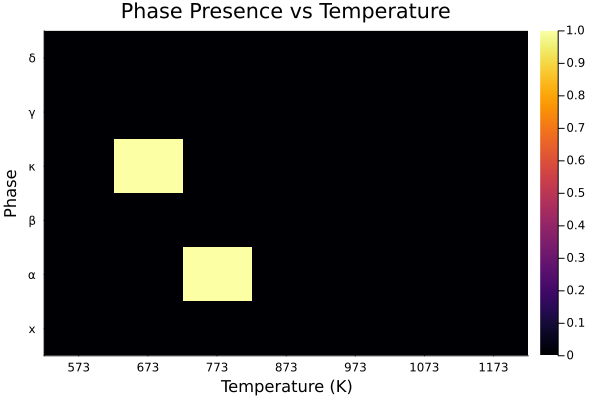

In [56]:
# Simulate deposition and transformation from 300K to 900K 
#display(Ea_values)
T_range = 573:100:1173
flow_rates = 1.0
threshold = 0.3 # Threshold for most preferable state
t = 600 # seconds
dt = 1.0/2 # 2 layers per second (700nm/hr)
num_steps = t/dt
phase_names = ["x", "α", "β", "κ", "γ", "δ"]
effecting_nums = num_steps
decay_constant = 0.00001
decay_coefficient = decay_constant * flow_rates #assuming the P(r) to be exp(-d * r * #of covering layers)
fcoeff = flow_coefficient("exponential", effecting_nums, decay_coefficient)
#println("fcoeff: ", size(fcoeff),fcoeff)
composition_data = simulate_deposition(fcoeff, Ea_values, T_range, num_steps, dt)
display(composition_data[1])
display(composition_data[3])
#println(size(composition_data))

# Calculate the most preferable state (maximum total composition) at each temperature
max_compositions = most_preferable_state(composition_data, threshold,phase_names)
max_compositions[2] = "κ"
max_compositions[3] = "α"
println(max_compositions)

# Create a presence matrix
presence_matrix = [occursin(phase, comp) ? 1 : 0 for comp in max_compositions, phase in phase_names]

# Plot presence/absence of each phase as a heatmap
heatmap(T_range, 1:length(phase_names), presence_matrix', 
    xlabel="Temperature (K)", ylabel="Phase",
    xticks=T_range, yticks=(1:length(phase_names), phase_names),
    title="Phase Presence vs Temperature", color=:auto)

In [21]:
#testing flow_coefficient function
function flow_coefficient(type, effecting_nums, decay_constant)
    A = 1.0
    flow_coefficients = []
    for i in 1:effecting_nums
        if type == "exponential"
            push!(flow_coefficients, A * exp(-decay_constant * i))
            print("e")
        elseif type == "linear"
            push!(flow_coefficients, A * (1 - decay_constant * i))
        end
    end
    return flow_coefficients
end
effecting_nums = 10
fcoeff = flow_coefficient("exponential", effecting_nums, 0.1)
display(fcoeff)
existing_layers = repeat([0.9, 0.1, 0, 0, 0, 0]', 10)
display(existing_layers)
println(size(existing_layers))

for i in 1:size(existing_layers, 1)
    existing_layers[i, :] = fcoeff[i] * existing_layers[i, :]
end
display(existing_layers)

10-element Vector{Any}:
 0.9048374180359595
 0.8187307530779818
 0.7408182206817179
 0.6703200460356393
 0.6065306597126334
 0.5488116360940264
 0.49658530379140947
 0.44932896411722156
 0.4065696597405991
 0.36787944117144233

10×6 Matrix{Float64}:
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0

10×6 Matrix{Float64}:
 0.814354  0.0904837  0.0  0.0  0.0  0.0
 0.736858  0.0818731  0.0  0.0  0.0  0.0
 0.666736  0.0740818  0.0  0.0  0.0  0.0
 0.603288  0.067032   0.0  0.0  0.0  0.0
 0.545878  0.0606531  0.0  0.0  0.0  0.0
 0.49393   0.0548812  0.0  0.0  0.0  0.0
 0.446927  0.0496585  0.0  0.0  0.0  0.0
 0.404396  0.0449329  0.0  0.0  0.0  0.0
 0.365913  0.040657   0.0  0.0  0.0  0.0
 0.331091  0.0367879  0.0  0.0  0.0  0.0

eeeeeeeeee(10, 6)


In [20]:
"""
function most_preferable_state(compositions, threshold)
    boolean_compositions = []
    for comp in compositions
        # Average all the layers
        avg_composition = mean(comp, dims=1)
        # True if greater than threshold
        boolean_composition = avg_composition .> threshold
        push!(boolean_compositions, boolean_composition)
    end
    return boolean_compositions
end
"""

"function most_preferable_state(compositions, threshold)\n    boolean_compositions = []\n    for comp in compositions\n        # Average all the layers\n        avg_composition = mean(comp, dims=1)\n        # True if greater than threshold\n        boolean_composition = avg_composition .> threshold\n        push!(boolean_compositions, boolean_composition)\n    end\n    return boolean_compositions\nend\n"

In [31]:
existing_layers = [1.0 0.0 0.0 0.0 0.0 0.0]
new_layers = similar(existing_layers)
T = 300
k_m = arrhenius_rate_matrix(A_values, Ea_values, T)
println(new_layers)
for i in 1:size(existing_layers, 1)
    # Transform existing layer
    for j in 1:size(existing_layers, 2)
        println(new_layers)
        new_layers[i, j] = existing_layers[i, j] .* (1 .- k_m[i, j])
        for k in 1:size(existing_layers, 2)
            if j != k
                new_layers[i, j] += existing_layers[i, k] * k_m[i, k]
            end
        end
    end
end

[2.5e-323 4.4e-323 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[2.5e-323 4.4e-323 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 4.4e-323 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 -3.8102770891384763 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 -3.8102770891384763 -3.8102770891384763 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 -3.8102770891384763 -3.8102770891384763 -3.8102770891384763 1.04e-322]


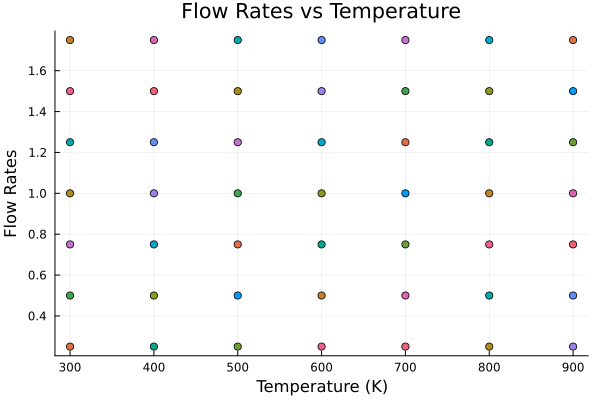

In [3]:
using Plots

T_range = 300:100:900
flow_rates = 0.25:0.25:1.75

p = scatter([], [], xlabel="Temperature (K)", ylabel="Flow Rates", title="Flow Rates vs Temperature", legend=false)  # Create an empty scatter plot

for T in T_range
    for rate in flow_rates
        scatter!(p, [T], [rate])  # Add a point to the scatter plot for each combination of T and rate
    end
end

p  # Display the scatter plot